# Phish Hook 
**(Model Devlopment & Evaluation)**


In [1]:
import pandas as pd

# loading out dataset from previous notebook
urldata = pd.read_csv("data/url_processed.csv")

In [2]:
urldata.head(10)

,Unnamed: 0,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length,count-,...,count.,count=,count_letters,count_digits,count_dir,use_of_ip,short_url,count_http,count_https,count_www
0,0,https://www.google.com,benign,0,22,14,0,0,3,0,...,2,0,17,0,0,1,1,1,1,1
1,1,https://www.youtube.com,benign,0,23,15,0,0,3,0,...,2,0,18,0,0,1,1,1,1,1
2,2,https://www.facebook.com,benign,0,24,16,0,0,3,0,...,2,0,19,0,0,1,1,1,1,1
3,3,https://www.baidu.com,benign,0,21,13,0,0,3,0,...,2,0,16,0,0,1,1,1,1,1
4,4,https://www.wikipedia.org,benign,0,25,17,0,0,3,0,...,2,0,20,0,0,1,1,1,1,1
5,5,https://www.reddit.com,benign,0,22,14,0,0,3,0,...,2,0,17,0,0,1,-1,1,1,1
6,6,https://www.yahoo.com,benign,0,21,13,0,0,3,0,...,2,0,16,0,0,1,1,1,1,1
7,7,https://www.google.co.in,benign,0,24,16,0,0,5,0,...,3,0,18,0,0,1,1,1,1,1
8,8,https://www.qq.com,benign,0,18,10,0,0,3,0,...,2,0,13,0,0,1,1,1,1,1
9,9,https://www.amazon.com,benign,0,22,14,0,0,3,0,...,2,0,17,0,0,1,1,1,1,1


In [3]:
# droping "Unnamed: 0" as its unncessary feature
urldata.drop("Unnamed: 0",axis=1,inplace=True)

# remove uneccessary columns: url, label
urldata.drop(["url","label"],axis=1,inplace=True)

urldata.head()

,result,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count_letters,count_digits,count_dir,use_of_ip,short_url,count_http,count_https,count_www
0,0,22,14,0,0,3,0,0,0,0,2,0,17,0,0,1,1,1,1,1
1,0,23,15,0,0,3,0,0,0,0,2,0,18,0,0,1,1,1,1,1
2,0,24,16,0,0,3,0,0,0,0,2,0,19,0,0,1,1,1,1,1
3,0,21,13,0,0,3,0,0,0,0,2,0,16,0,0,1,1,1,1,1
4,0,25,17,0,0,3,0,0,0,0,2,0,20,0,0,1,1,1,1,1


In [4]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   result           450176 non-null  int64
 1   url_length       450176 non-null  int64
 2   hostname_length  450176 non-null  int64
 3   path_length      450176 non-null  int64
 4   fd_length        450176 non-null  int64
 5   tld_length       450176 non-null  int64
 6   count-           450176 non-null  int64
 7   count@           450176 non-null  int64
 8   count?           450176 non-null  int64
 9   count%           450176 non-null  int64
 10  count.           450176 non-null  int64
 11  count=           450176 non-null  int64
 12  count_letters    450176 non-null  int64
 13  count_digits     450176 non-null  int64
 14  count_dir        450176 non-null  int64
 15  use_of_ip        450176 non-null  int64
 16  short_url        450176 non-null  int64
 17  count_http       450176 non-n

In [5]:
# Only use lexical features

# Independent Variables
x = urldata[['hostname_length', 'url_length', 'short_url',
       'path_length', 'fd_length', 'tld_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count_http','count_https', 'count_www', 
       'count_digits', 'count_letters', 'count_dir', 'use_of_ip']]

#Dependent Variable
y = urldata['result']

In [6]:
# printing x
x.head()

,hostname_length,url_length,short_url,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count_http,count_https,count_www,count_digits,count_letters,count_dir,use_of_ip
0,14,22,1,0,0,3,0,0,0,0,2,0,1,1,1,0,17,0,1
1,15,23,1,0,0,3,0,0,0,0,2,0,1,1,1,0,18,0,1
2,16,24,1,0,0,3,0,0,0,0,2,0,1,1,1,0,19,0,1
3,13,21,1,0,0,3,0,0,0,0,2,0,1,1,1,0,16,0,1
4,17,25,1,0,0,3,0,0,0,0,2,0,1,1,1,0,20,0,1


In [7]:
# printing y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: result, dtype: int64

## SMOTE: Oversampling Imbalanced Dataset
Due to the dataset being imbalanced, SMOTE technique is used to increase the total number of samples from 450k to around 600k. Next, from this dataset, 10,000 URLs are randomly collected from each class to train Machine Learning models

In [8]:
#Oversampling using SMOTE
from imblearn.over_sampling import SMOTE

In [9]:
x_sample, y_sample = SMOTE().fit_resample(x, y.values.ravel())

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

In [10]:
# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

Size of x-sample : (691476, 19)
Size of y-sample : (691476, 1)


# 4.0 Model Development
## Data Splitting

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size = 0.2)
print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)

Shape of x_train:  (553180, 19)
Shape of x_valid:  (138296, 19)
Shape of y_train:  (553180, 1)
Shape of y_valid:  (138296, 1)


Since the current problem is a binary classification problem, it comes under deep learning and supervised machine learning. 

Some suitable algorithms are used:
1. Decision Tree
2. Random Forest
3. Multilayer Perceptron

## 4.1 Decision Tree


In [12]:
# Creating holders to store the model performance results
ml_model = []
Accuracy = []
Precision = []
Recall = []
F1_score = []
AUC = []

#function to call for storing the results
def storeResults(model, a, b, c, d, e):
  ml_model.append(model)
  Accuracy.append(round(a, 4))
  Precision.append(round(b, 4))
  Recall.append(round(c, 4))
  F1_score.append(round(d, 4))
  AUC.append(round(e, 4))


**Finding optimal depth via K-fold Cross Validation**

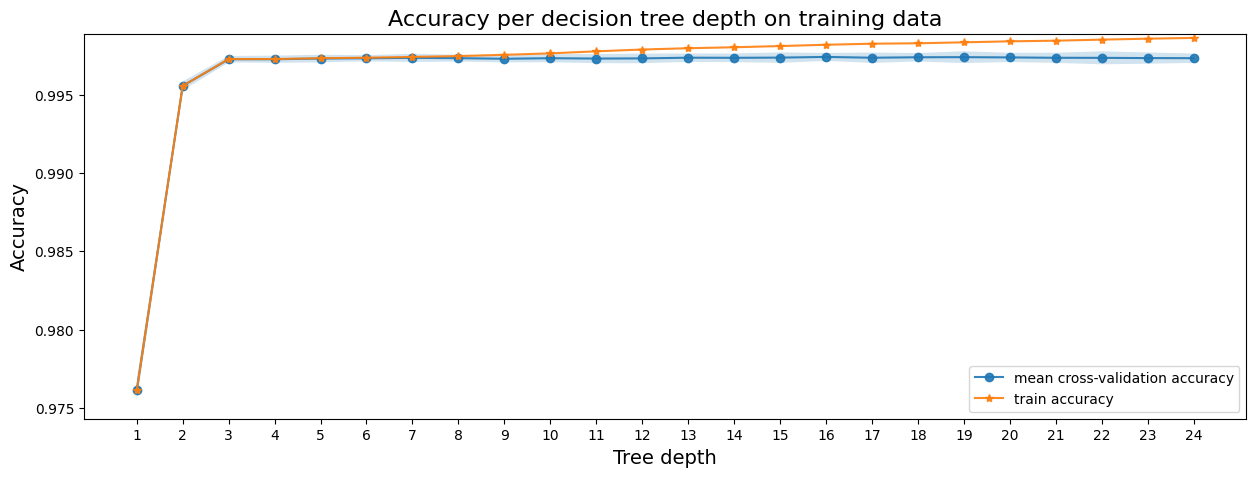

In [182]:
# Finding optimal depth via K-fold cross validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
# cv 5 = five-fold cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(x_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [184]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-16 tree achieves the best mean cross-validation accuracy 99.74384 +/- 0.01278% on training dataset


In [185]:
# function for training and evaluating a tree
def run_single_tree(X_train, y_train, X_test, y_test, depth):
    model = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Training Set: ', round(accuracy_train,4))
    print('Accuracy, Test Set: ', round(accuracy_test,4))
    return accuracy_train, accuracy_test
  

# train and evaluate a 16-depth tree
sm_best_tree_accuracy_train, sm_best_tree_accuracy_test = run_single_tree(x_train, y_train, 
                                                                          x_test, y_test, 
                                                                          sm_best_tree_depth)

Single tree depth:  16
Accuracy, Training Set:  0.9982
Accuracy, Test Set:  0.9976


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(max_depth=16)

# start training the model
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=16)

In [14]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# finding y_pred for train and test dataset
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# finding accuracy on train dataset
train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test,y_pred_test)

print("Accuracy on Training dataset : ",round(train_acc,4))
print("Accuracy on Testing dataset : ",round(test_acc,4))

Accuracy on Training dataset :  0.9983
Accuracy on Testing dataset :  0.9976


In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Precision
dt_precision = precision_score(y_test, y_pred_test)
print('Precision:', round(dt_precision,4))
# Recall
dt_recall = recall_score(y_test, y_pred_test)
print('Recall:', round(dt_recall,4))
# F1 Score
dt_f1 = f1_score(y_test, y_pred_test)
print('F1 score:', round(dt_f1,4))
# ROC AUC
dt_auc = roc_auc_score(y_test, y_pred_test)
print('AUC for Decision Tree:', round(dt_auc,4))

Precision: 0.9988
Recall: 0.9964
F1 score: 0.9976
AUC for Decision Tree: 0.9976


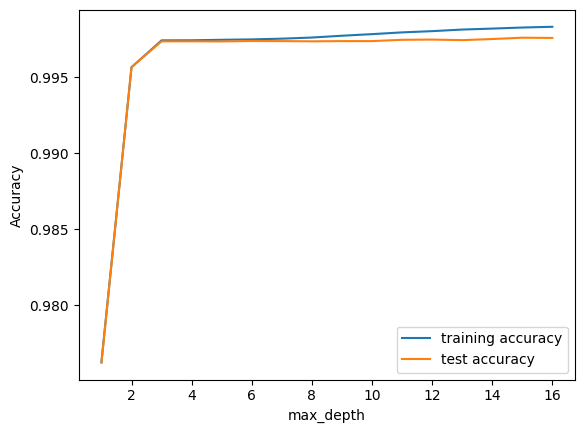

In [16]:
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 16
depth = range(1,17)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(x_train, y_train)
    # Record training set accuracy
    training_accuracy.append(tree_test.score(x_train, y_train))
    # Record generalization accuracy
    test_accuracy.append(tree_test.score(x_test, y_test))
    

# Plot accuracy graph
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [17]:
# Store results
storeResults('Decision Tree', test_acc, dt_precision, dt_recall, dt_f1, dt_auc)

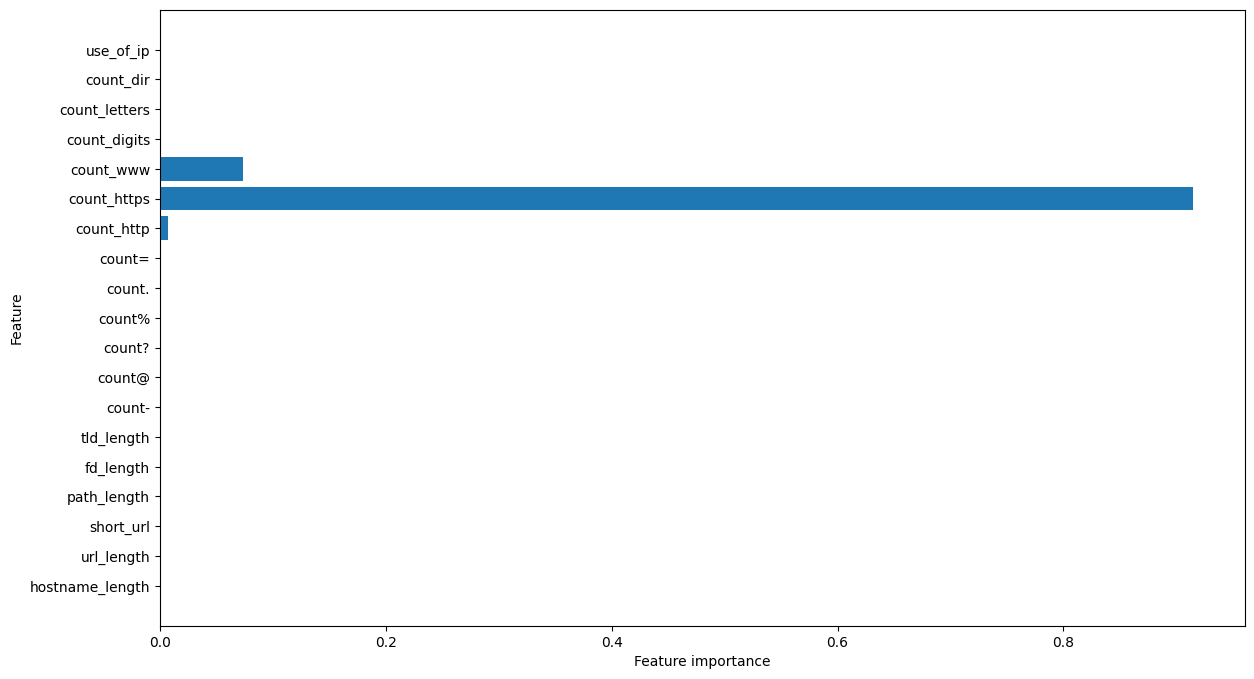

In [18]:
feature_names = ['hostname_length', 'url_length', 'short_url',
       'path_length', 'fd_length', 'tld_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count_http','count_https', 'count_www', 
       'count_digits', 'count_letters', 'count_dir', 'use_of_ip']

#checking the feature improtance in the model
plt.figure(figsize=(14,8))
n_features = x_train.shape[1]
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features),feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## 4.2 Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=50)

# start training the model
model.fit(x_train,y_train.values.ravel())

RandomForestClassifier(n_estimators=50)

In [21]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# finding y_pred for train and test dataset
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# finding accuracy on train dataset
train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test,y_pred_test)

print("Accuracy on Training dataset : ",round(train_acc,4))
print("Accuracy on Testing dataset : ",round(test_acc,4))

Accuracy on Training dataset :  0.9993
Accuracy on Testing dataset :  0.9981


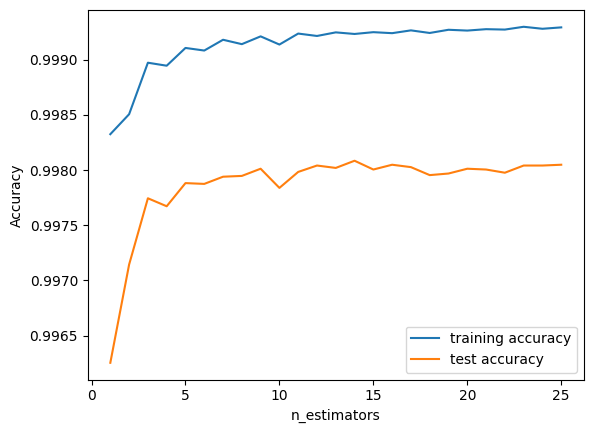

In [22]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 25
depth = range(1,26)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(x_train, y_train.values.ravel())
    # record training set accuracy
    training_accuracy.append(forest_test.score(x_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(x_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 25
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Precision
rf_precision = precision_score(y_test, y_pred_test)
print('Precision:', round(rf_precision,4))
# Recall
rf_recall = recall_score(y_test, y_pred_test)
print('Recall:', round(rf_recall,4))
# F1 Score
rf_f1 = f1_score(y_test, y_pred_test)
print('F1 score:', round(rf_f1,4))
# ROC AUC
rf_auc = roc_auc_score(y_test, y_pred_test)
print('AUC for Random Forest:', round(rf_auc,4))

Precision: 0.9988
Recall: 0.9974
F1 score: 0.9981
AUC for Random Forest: 0.9981


In [24]:
# Store results
storeResults('Random Forest', test_acc, rf_precision, rf_recall, rf_f1, rf_auc)

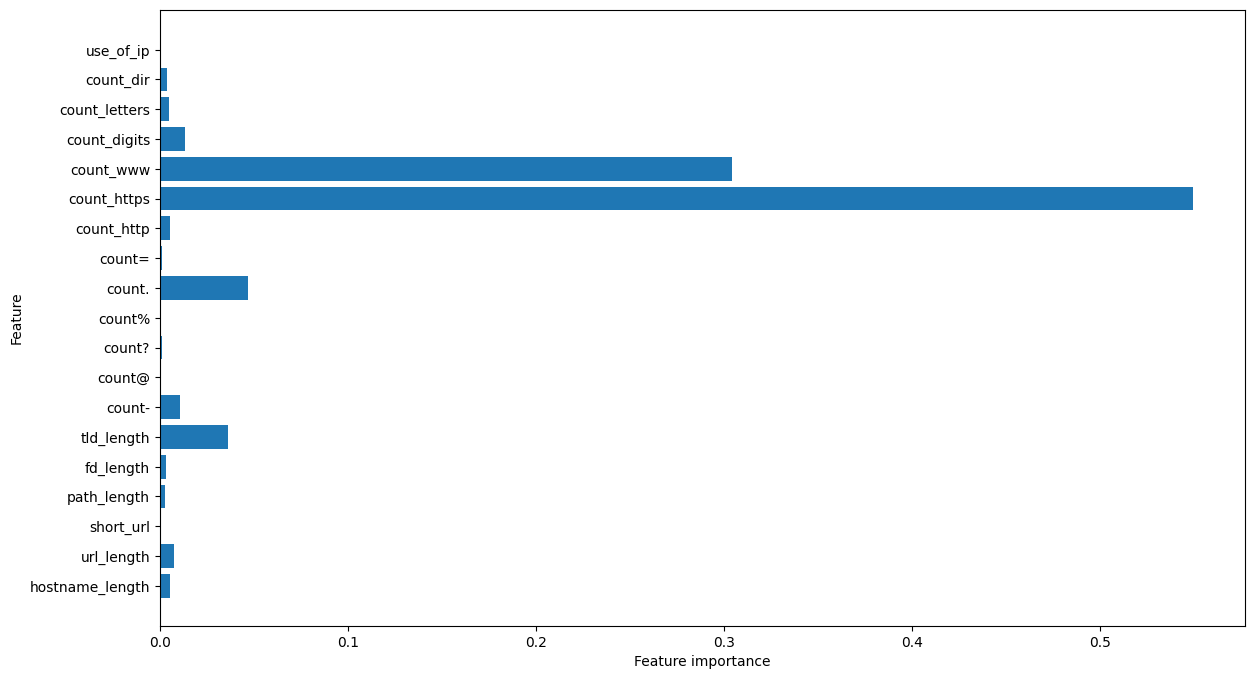

In [25]:
feature_names = ['hostname_length', 'url_length', 'short_url',
       'path_length', 'fd_length', 'tld_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count_http','count_https', 'count_www', 
       'count_digits', 'count_letters', 'count_dir', 'use_of_ip']

#checking the feature improtance in the model
plt.figure(figsize=(14,8))
n_features = x_train.shape[1]
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features),feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## 4.3 Multilayer Perceptron

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization ,Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

In [27]:
# print input shape
x_train.shape

(553180, 19)

In [32]:
# model building
model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (19, )))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                640       
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________


In [33]:
# compiling model
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer= opt ,loss='binary_crossentropy',metrics=['acc'])

In [34]:
# custom callback to stop the training when certain metric value is reached

# stop training when validation loss reach 0.1
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<0.1):
            print("\nReached 0.1 val_loss so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()

In [35]:
# start training the model 
history = model.fit(x_train, y_train, epochs=10,batch_size=256, callbacks=[callback],validation_data=(x_test,y_test),verbose=1)

Epoch 1/10
2161/2161 [==============================] - 6s 3ms/step - loss: 0.6789 - acc: 0.6150 - val_loss: 0.5350 - val_acc: 0.8474
Epoch 2/10
2157/2161 [============================>.] - ETA: 0s - loss: 0.2092 - acc: 0.9544
Reached 0.1 val_loss so cancelling training!
2161/2161 [==============================] - 5s 3ms/step - loss: 0.2090 - acc: 0.9545 - val_loss: 0.0762 - val_acc: 0.9853


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


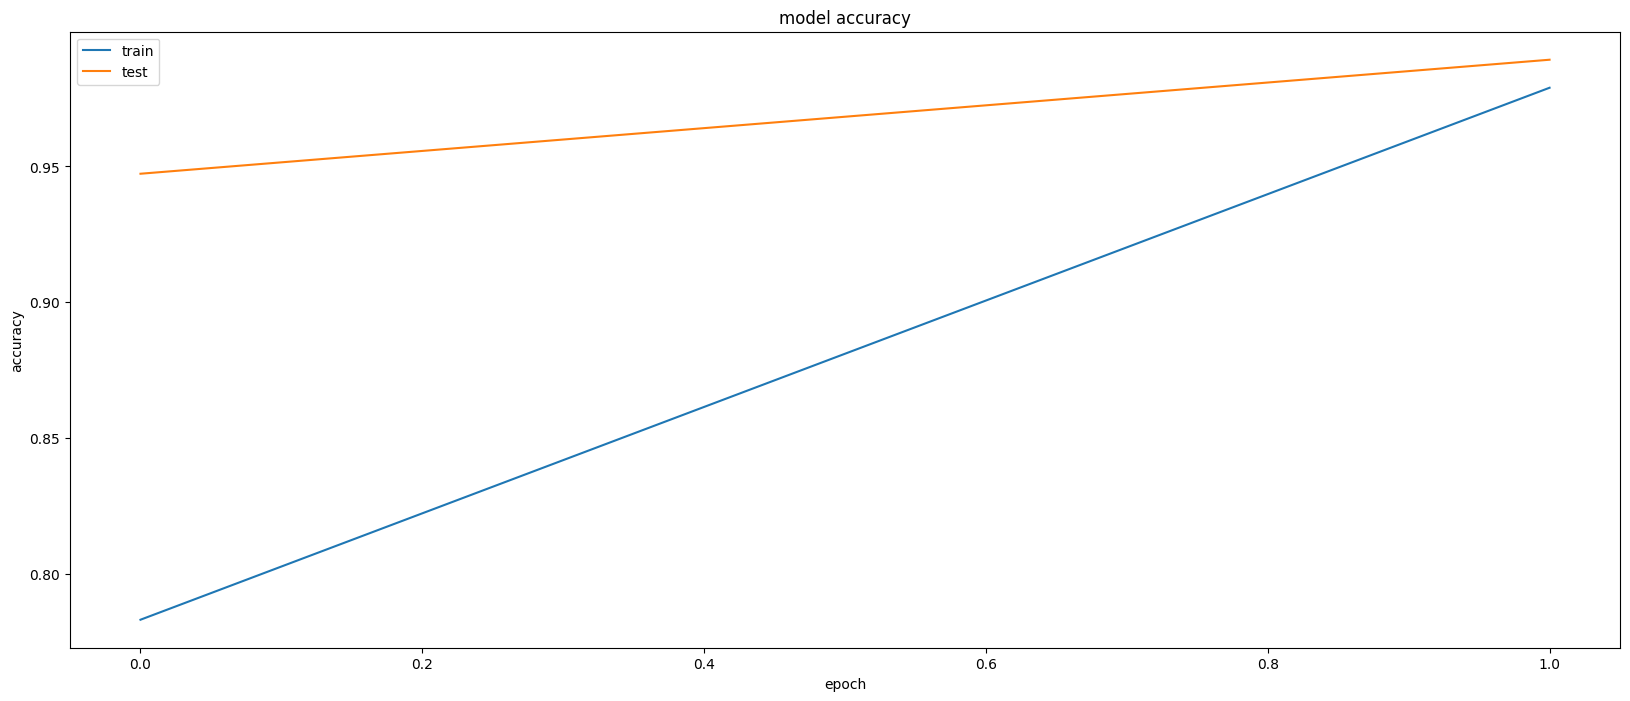

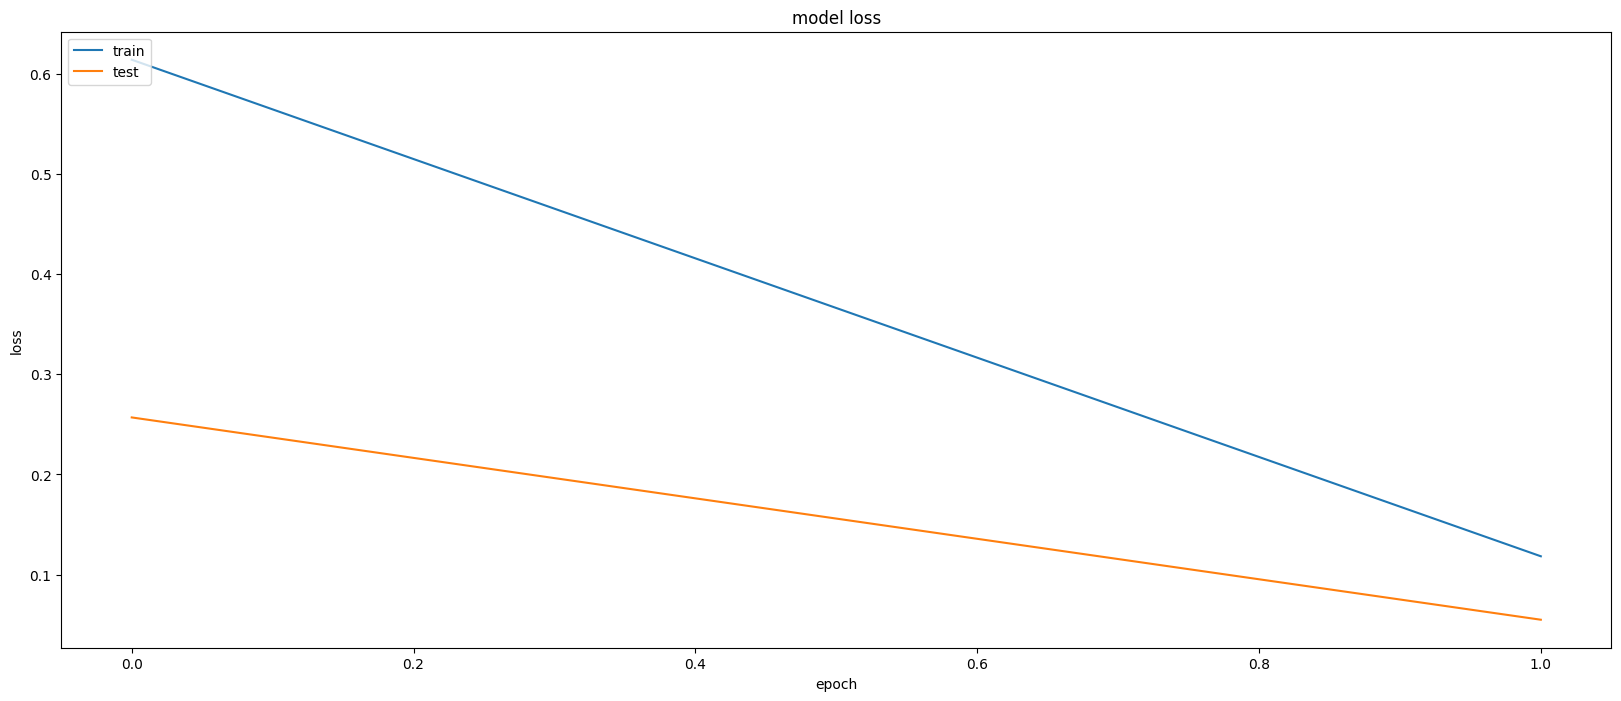

In [31]:
# Display model training history

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.figure(figsize=(20,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
# Evaluate the model on test dataset
loss, acc = model.evaluate(x_test,y_test,verbose=1)
print('Test loss: {}',round(loss,4))
print('Test Accuracy: {}',round(acc,4))


4322/4322 [==============================] - 8s 2ms/step - loss: 0.0762 - acc: 0.9853
Test loss: {} 0.0762
Test Accuracy: {} 0.9853


In [37]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# predict probabilities for test set
yhat_probs = model.predict(x_test, verbose=0)
# predict crisp classes for test set
yhat_classes = (model.predict(x_test)>0.5).astype("int32")
# reduce to 1d array
## The scikit-learn metrics API expects a 1D array of actual 
##and predicted values for comparison, therefore, 
##we must reduce the 2D prediction arrays to 1D arrays.
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# precision tp / (tp + fp)
mlp_precision = precision_score(y_test, yhat_classes)
print('Precision:', round(mlp_precision,4))
# recall: tp / (tp + fn)
mlp_recall = recall_score(y_test, yhat_classes)
print('Recall:', round(mlp_recall,4))
# f1: 2 tp / (2 tp + fp + fn)
mlp_f1 = f1_score(y_test, yhat_classes)
print('F1 score:', round(mlp_f1,4))
# ROC AUC
mlp_auc = roc_auc_score(y_test, yhat_probs)
print('AUC for Multilayer Perceptron: ', round(mlp_auc,4))

4322/4322 [==============================] - 6s 1ms/step
Precision: 0.995
Recall: 0.9756
F1 score: 0.9852
AUC for Multilayer Perceptron:  0.9973


In [38]:
# Store results
storeResults('Multilayer Perceptron', acc, mlp_precision, mlp_recall, mlp_f1, mlp_auc)

# Model Comparison

In [39]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ml_model,
                        'Accuracy' : Accuracy,
                       'Precision' : Precision,
                       'Recall'    : Recall,
                       "F1 Score"  : F1_score,
                       'AUC'       : AUC
                      })

In [40]:
# dispalying total result
result

,ML Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Decision Tree,0.9976,0.9988,0.9964,0.9976,0.9976
1,Random Forest,0.9981,0.9988,0.9974,0.9981,0.9981
2,Multilayer Perceptron,0.9853,0.9950,0.9756,0.9852,0.9973


**Random Forest** has the highest accuracy.

# Final Model Evaluation

In [41]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
clf = RandomForestClassifier(n_estimators=50)

# Fit the model
clf.fit(x_train,y_train.values.ravel())

RandomForestClassifier(n_estimators=50)

In [42]:
res = clf.predict(x)
mt = confusion_matrix(y, res)

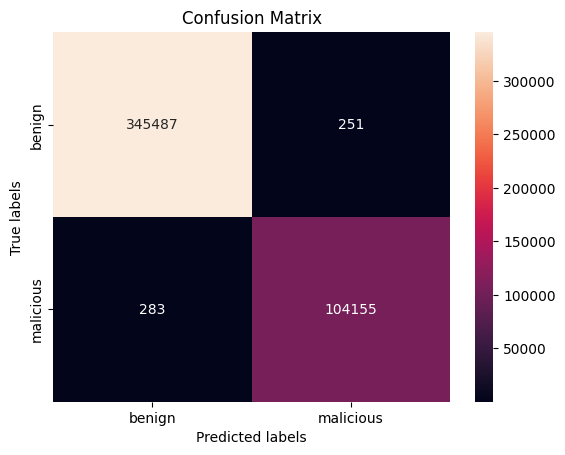

In [43]:
import seaborn as sns

ax= plt.subplot()
sns.heatmap(mt, annot=True, fmt='d'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['benign', 'malicious']); ax.yaxis.set_ticklabels(['benign', 'malicious']);

In [44]:
# False Positive and False Negative rates
from sklearn.metrics import f1_score

FP = (mt[0][1] / float(sum(mt[0])))*100
FN = (mt[1][0] / float(sum(mt[1])))*100
#F1 = f1_score(y, res, average='binary')
print("False positive rate : %f %%" % FP)
print('False negative rate : %f %%' % FN)
#print("F1 Score is: ", F1)

False positive rate : 0.072598 %
False negative rate : 0.270974 %


In [52]:
## AUC
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y, res, pos_label=1)
auc = metrics.auc(fpr, tpr)
print("The model AUC is: ", rf_auc)



The model AUC is:  0.9980691656075606


In [46]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [47]:
import prettytable
T = prettytable.PrettyTable(["Random Forest", "n_estimators = 50"])
T.add_row(["False Positive", str(round(FP,3))+"%"]) 
T.add_row(["False Negative", str(round(FN,3))+"%"]) 
T.add_row(["F1 Score", round(rf_f1,4)])  
T.add_row(["AUC", round(rf_auc,4)])
print(T)

+----------------+-------------------+
| Random Forest  | n_estimators = 50 |
+----------------+-------------------+
| False Positive |       0.073%      |
| False Negative |       0.271%      |
|    F1 Score    |       0.9981      |
|      AUC       |       0.9981      |
+----------------+-------------------+


## Predicting the accuracy using testing data

In [48]:
# predicting on test data.
pred_test = clf.predict(x_test)
for i in range (len(pred_test)):
    if (pred_test[i] < 0.5):
        pred_test[i] = 0
    else:
        pred_test[i] = 1
pred_test = pred_test.astype(int)

def view_result(array):
    array = np.array(array)
    for i in range(len(array)):
        if array[i] == 0:
            print("Non Malicious")
        else:
            print("Malicious")

print("PREDICTED : ")
view_result(pred_test[:10])
print("\n")
print("ACTUAL : ")
view_result(y_test[:10])

PREDICTED : 
Non Malicious
Non Malicious
Malicious
Non Malicious
Non Malicious
Malicious
Non Malicious
Non Malicious
Malicious
Non Malicious


ACTUAL : 
Non Malicious
Non Malicious
Malicious
Non Malicious
Non Malicious
Malicious
Non Malicious
Non Malicious
Malicious
Non Malicious


In [50]:
clf_acc = accuracy_score(y_test, pred_test)

print("Classification accuracy : ",round(clf_acc,4))

Classification accuracy :  0.998


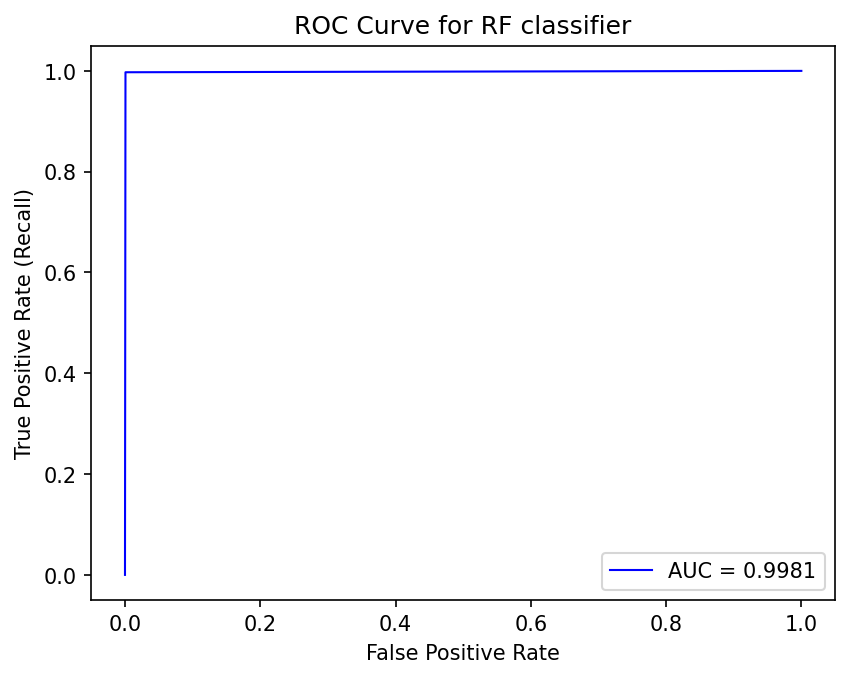

In [53]:
# ROC Curves and Area Under the Curve (AUC)
##AUC is the percentage of the ROC plot that is underneath the curve
##Higher value = better classifier

roc_auc = rf_auc

plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='blue', label=f'AUC = {roc_auc:.4f}')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()


#from sklearn.metrics import RocCurveDisplay
#clf_disp = RocCurveDisplay.from_estimator(clf, x_test, y_test)
#plt.show()


## Saving Prediction Model

In [54]:
# Save Model with pickle
import pickle

pickle.dump(clf, open('model/malicious_url_prediction.pkl', 'wb'))

#filename = "model/malicious_url_prediction.pkl"
#with open(filename, 'wb') as file:
    #pickle.dump(clf, file)    

